# IS 4487 Week 13 - Text Analytics Demo

This notebook is designed to help you follow along with the **Week 13 Lecture and Reading**, introducing you to Python.

The practice code demos are intended to give you a chance to see working code and can be a source for your lap and assignment work. Each section contains short explanations and annotated code that reflect the steps in the reading.


---
## Topics for this demo

* Tokenization
* Stopword removal
* Lemmatization
* Sentiment analysis (VADER)

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Demos/demo_12_text_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


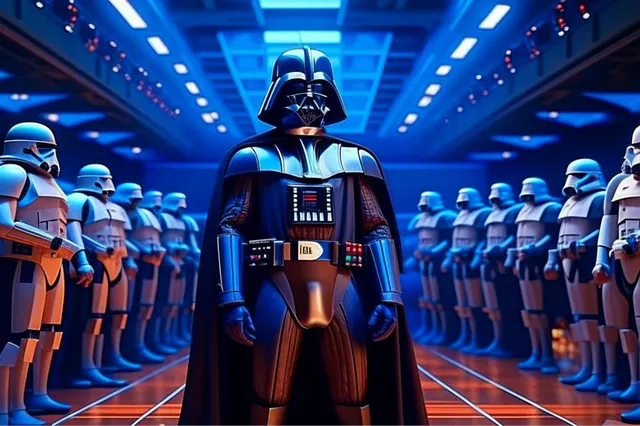


---
## Background

Businesses today collect huge amounts of unstructured text data — from customer reviews to social media posts and survey responses.  
Before we can analyze this text, we need to **clean and prepare it** so it can be used for modeling or insight generation.

In this demo, we’ll play the role of a **marketing analyst** reviewing customer feedback about a new smartphone.  
By applying NLTK tools, we’ll extract insights about customer sentiment and key product reactions.

---
## 1. Import Libraries and Example Data

We’ll start by importing **NLTK** (the Natural Language Toolkit), one of the most common libraries used for text preprocessing and sentiment analysis.  

Because we don’t have a real dataset, we’ll simulate a small set of customer reviews.  
This helps demonstrate the core NLP pipeline without requiring large files or external APIs.


In [ ]:
#1 - IMPORTS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

#1A - EXAMPLE DATA
reviews = [
    "The new phone design is amazing! Battery lasts all day.",
    "Pretty disappointed with the camera quality.",
    "Great value for the price. Totally worth it!",
    "The update ruined performance — so laggy now.",
    "Customer service was super helpful and polite."
]

---
## 2. Tokenization and Stopword Removal

**Tokenization** means breaking text into smaller pieces — usually words or sentences — so they can be analyzed.  
Next, we’ll remove **stopwords** (common words like “the,” “and,” or “to”) that don’t add analytical value.  
This step helps us focus on meaningful words that actually carry information about the topic or sentiment.


In [ ]:
#2 - TOKENIZATION
tokens = [word_tokenize(review.lower()) for review in reviews]

print("Example Tokens for First Review:")
print(tokens[0])

#2A - STOPWORD REMOVAL
stop_words = set(stopwords.words('english'))
cleaned_tokens = [[word for word in review if word.isalpha() and word not in stop_words]
                  for review in tokens]

print("\nCleaned Tokens (stopwords/punctuation removed):")
print(cleaned_tokens[0])


---
## 3. Lemmatization

Lemmatization reduces words to their **base or dictionary form** using grammatical rules.  
For example:
- “running” → “run”
- “better” → “good”

This ensures that words referring to the same concept are treated consistently during analysis.


In [ ]:
#3 - LEMMATIZATION
lemmatizer = WordNetLemmatizer()
lemmatized = [[lemmatizer.lemmatize(word) for word in review] for review in cleaned_tokens]

print("Lemmatized Words (first review):")
print(lemmatized[0])


---
## 4. Sentiment Analysis with VADER

Now that our text is clean, we can measure how people *feel* about the product.

**VADER** (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analyzer built into NLTK.  
It’s especially good for short, informal text like reviews or tweets.  

It assigns four scores:
- **Positive**
- **Negative**
- **Neutral**
- **Compound** (overall sentiment from –1 to +1)

This lets us quickly see how customers are responding without reading every review.


In [ ]:
#4 - SENTIMENT ANALYSIS
sia = SentimentIntensityAnalyzer()

for review in reviews:
    sentiment = sia.polarity_scores(review)
    print(f"\nReview: {review}")
    print(f"Sentiment Scores: {sentiment}")


---
## 5. Visualizing Sentiment Scores

To make our results easier to interpret, we can plot each review’s compound sentiment score using Matplotlib.  
Bars above zero indicate positive sentiment, while bars below zero indicate negative feedback.

This kind of quick visualization helps analysts and managers gauge overall customer mood at a glance.


In [ ]:
#5 - SIMPLE SENTIMENT VISUALIZATION
import matplotlib.pyplot as plt

compound_scores = [sia.polarity_scores(r)['compound'] for r in reviews]
plt.bar(range(len(reviews)), compound_scores)
plt.title("Customer Review Sentiment Scores")
plt.xlabel("Review #")
plt.ylabel("Compound Sentiment (-1 to +1)")
plt.show()


## (Optional) Descriptive Text Mining — WordClouds and N-grams

Beyond sentiment scores, we can explore **what people are talking about** using descriptive text analysis.

- **Word clouds** show the most frequent terms at a glance — larger words appear more often.  
- **N-gram analysis** reveals common word pairs (like “great service” or “poor quality”) that provide extra context.

These quick techniques help summarize large amounts of feedback visually and intuitively.


In [ ]:
# ==========================================
# OPTIONAL 1 — WORD CLOUD
# ==========================================
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all lemmatized words into a single string
all_words = ' '.join([' '.join(review) for review in lemmatized])

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Customer Reviews")
plt.show()
